# Feature Engineering

#### What is Feature Engineering?
>In Data Preprocessing, feature engineering plays a major role. Here we will check the dataset and handle the missing values in the dataset and makes the imbalanced dataset to balanced dataset, need to verify the outliers in the dataset. Encoding categorical values such as Onehot Encoding, Label Encoding and Feature Scaling takes place here.

### Handling Missing Values

In [28]:
import pandas as pd

df = pd.read_csv('airlines_dataset.csv')

In [29]:
#Getting info of the dataframe
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Boarding Zone        891 non-null    int64  
 2   Name                 891 non-null    object 
 3   Gender               891 non-null    object 
 4   Age                  714 non-null    float64
 5   No. of Luggage Bags  891 non-null    int64  
 6   Hand Bags            891 non-null    int64  
 7   TicketID             891 non-null    object 
 8   Fare                 891 non-null    float64
 9   Flight Stop          889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [30]:
# Checking whether the dataframe contains null values
df.isna().sum()

PassengerId              0
Boarding Zone            0
Name                     0
Gender                   0
Age                    177
No. of Luggage Bags      0
Hand Bags                0
TicketID                 0
Fare                     0
Flight Stop              2
dtype: int64

In [ ]:
# Here we are able to see the Age has 177 missing values and Flight Stop has 2 missing values

#### What can be done in this missing values?
>We can delete the null values columns (i.e. Age in this dataset).
#### What happen if I delete this data?
>May be this can affect the model performance. Sometimes it won't affect model computation, it is based on the data
#### What needs to be done if I need this column(feature)?
>Mean, median, mode of the column can be used to fill the missing values.

#### Median Imputation for the dataset

In [38]:
# Making a copy of the dataframe
df1 = df

# Filling the missing values with median of Age
df1['Age'] = df1['Age'].fillna(df1['Age'].median())

In [37]:
df1.isna().sum()
#Now we are able to see the Age doesn't have any null values

PassengerId            0
Boarding Zone          0
Name                   0
Gender                 0
Age                    0
No. of Luggage Bags    0
Hand Bags              0
TicketID               0
Fare                   0
Flight Stop            2
dtype: int64

#### Mode Imputation for the dataset

In [45]:
df1['Flight Stop'] = df1['Flight Stop'].fillna(df1['Flight Stop'].mode(), inplace=True)

C:\Users\Divya S\AppData\Local\Temp\ipykernel_14172\449009604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Flight Stop'] = df1['Flight Stop'].fillna(df1['Flight Stop'].mode(), inplace=True)


In [47]:
df1.isna().sum()
#Now we are able to see the Flight stop doesn't have any null values

PassengerId              0
Boarding Zone            0
Name                     0
Gender                   0
Age                      0
No. of Luggage Bags      0
Hand Bags                0
TicketID                 0
Fare                     0
Flight Stop            891
dtype: int64

__Techniques to make the imbalanced dataset into the balanced dataset__
- UnderSampling (Not Preferrable, making the data so less may affect the model performance)
- OverSampling (Preferrrable, Adding the data again and again to make the data more stable)
- SMOTE (Synthetic Minority OverSampling Technique) --> It will add the data based on the data distance, it does not make the data duplicate like Oversampling

#### How to find the Outliers
>Using the boxplot function in seaborn library we are able to find out the outliers

In [60]:
import seaborn as sns

<Axes: ylabel='Age'>

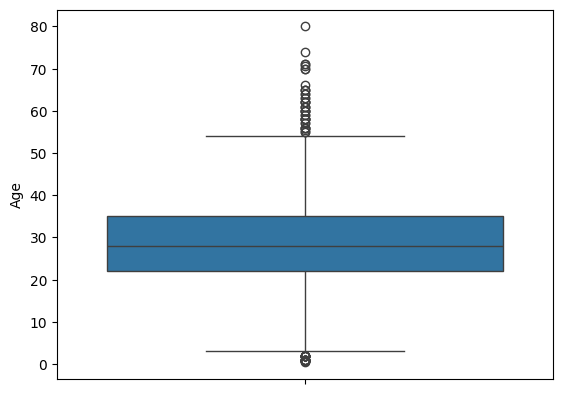

In [62]:
sns.boxplot(df['Age'])

#### Data Encoding

##### Onehot Encoding

In [67]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

onehotencoder = OneHotEncoder()

In [74]:
boarding_encoder = onehotencoder.fit_transform(df[['Gender']]).toarray()

In [75]:
print(boarding_encoder)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [80]:
boarding_zone_df = pd.DataFrame(boarding_encoder, columns=onehotencoder.get_feature_names_out())

In [81]:
boarding_zone_df

,Gender_female,Gender_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


##### Label Encoding

In [85]:
label_encoding = LabelEncoder()

In [86]:
label_encoder = label_encoding.fit_transform(df['Boarding Zone'])

In [89]:
label_encoding_df = pd.DataFrame(label_encoder, columns=['BoardingZone'])

In [90]:
label_encoding_df

,BoardingZone
0,2
1,0
2,2
3,0
4,2
...,...
886,1
887,0
888,2
889,0


##### Ordinal Encoding

In [93]:
ordinalencoder = OrdinalEncoder(categories=[['female', 'male']])

ordinal_encoder = ordinalencoder.fit_transform(df[['Gender']])

ordinal_encoder_df = pd.DataFrame(ordinal_encoder, columns=['Gender_ordinal'])

In [94]:
ordinal_encoder_df

,Gender_ordinal
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
886,1.0
887,0.0
888,0.0
889,1.0


#### Feature Scaling

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [102]:
df_standardScaler = scaler.fit_transform(df[['Boarding Zone']])
pd.DataFrame(df_standardScaler)

,0
0,0.827377
1,-1.566107
2,0.827377
3,-1.566107
4,0.827377
...,...
886,-0.369365
887,-1.566107
888,0.827377
889,-1.566107
